<a href="https://colab.research.google.com/github/sbucdaivs/ECS_189G_Project/blob/Stage_5_main/stage_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# base class

dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import abc

class dataset:
    """ 
    dataset: Abstract Class 
    Entries: dataset_name: the name of the dataset
             dataset_description: the textual description of the dataset
    """
    
    dataset_name = None
    dataset_descrition = None
    
    dataset_source_folder_path = None
    dataset_source_file_name = None
    
    data = None
    
    # initialization function
    def __init__(self, dName=None, dDescription=None):
        '''
        Parameters: dataset name: dName, dataset description: dDescription
        Assign the parameters to the entries of the base class
        '''
        self.dataset_name = dName
        self.dataset_descrition = dDescription
    
    # information print function
    def print_dataset_information(self):
        '''
        Print the basic information about the dataset class
        inclduing the dataset name, and dataset description
        '''
        print('Dataset Name: ' + self.dataset_name)
        print('Dataset Description: ' + self.dataset_descrition)

    # dataset load abstract function
    @abc.abstractmethod
    def load(self):
        return

In [ ]:
'''
Base evaluate class for all evaluation metrics and methods
'''

# Copyright (c) 2017 Jiawei Zhang <jwzhanggy@gmail.com>
# License: TBD


import abc


class evaluate:
    """ 
    evaluate: Abstract Class
    Entries: 
    """
    
    evaluate_name = None
    evaluate_description = None
    
    data = None
    
    # initialization function
    def __init__(self, eName=None, eDescription=None):
        self.evaluate_name = eName
        self.evaluate_description = eDescription

    @abc.abstractmethod
    def evaluate(self):
        return


In [ ]:
'''
Base MethodModule class for all models and frameworks
'''

# Copyright (c) 2017 Jiawei Zhang <jwzhanggy@gmail.com>
# License: TBD


import abc


class method:
    '''
    MethodModule: Abstract Class
    Entries: method_name: the name of the MethodModule 
             method_description: the textual description of the MethodModule
             
             method_start_time: start running time of MethodModule
             method_stop_time: stop running time of MethodModule
             method_running_time: total running time of the MethodModule
             method_training_time: time cost of the training phrase
             method_testing_time: time cost of the testing phrase
    '''
    
    method_name = None
    method_description = None
    
    data = None
    
    method_start_time = None
    method_stop_time = None
    method_running_time = None
    method_training_time = None
    method_testing_time = None

    # initialization function
    def __init__(self, mName=None, mDescription=None):
        self.method_name = mName
        self.method_description = mDescription

    # running function
    @abc.abstractmethod
    def run(self, trainData, trainLabel, testData):
        return


In [ ]:
'''
Base evaluate class for all evaluation metrics and methods
'''

# Copyright (c) 2017 Jiawei Zhang <jwzhanggy@gmail.com>
# License: TBD


import abc

class result:
    """
    ResultModule: Abstract Class
    Entries: 
    """
    
    data = None
    
    result_name = None
    result_description = None
    
    result_destination_folder_path = None
    result_destination_file_name = None
    
    # initialization function
    def __init__(self, rName=None, rType=None):
        self.result_name = rName
        self.result_description = rType

    @abc.abstractmethod
    def save(self):
        return
 
    @abc.abstractmethod
    def load(self):
        return


In [ ]:
'''
Base SettingModule class for all experiment settings
'''

# Copyright (c) 2017 Jiawei Zhang <jwzhanggy@gmail.com>
# License: TBD

import abc

#-----------------------------------------------------
class setting:
    '''
    SettingModule: Abstract Class
    Entries: 
    '''
    
    setting_name = None
    setting_description = None

    fold = None
    
    dataset = None
    method = None
    result = None
    evaluate = None


    def __init__(self, sName=None, sDescription=None):
        self.setting_name = sName
        self.setting_description = sDescription
    
    def prepare(self, sDataset, sMethod, sResult, sEvaluate):
        self.dataset = sDataset
        self.method = sMethod
        self.result = sResult
        self.evaluate = sEvaluate

    def print_setup_summary(self):
        print('dataset:', self.dataset.dataset_name, ', method:', self.method.method_name,
              ', setting:', self.setting_name, ', result:', self.result.result_name,
              ', evaluation:', self.evaluate.evaluate_name)
        print('k: ', self.fold, ',epoch: ', self.method.max_epoch, ', learning rate: ', self.method.learning_rate) # TODO: Formatting


    @abc.abstractmethod
    def load_run_save_evaluate(self):
        return


# stage_3_code

In [ ]:
import pickle
import matplotlib.pyplot as plt



class Dataset_Loader(dataset):
    data: dict = None
    dataset_source_folder_path = None
    dataset_source_file_name = None
    data_type = None

    def __init__(self, dName=None, dDescription=None):
        super().__init__(dName, dDescription)

    def pre_load(self):
        f = open(self.dataset_source_folder_path + self.dataset_source_file_name, 'rb')
        self.data = pickle.load(f)
        f.close()

    # TODO: update below to reflect different data structure
    def load(self, dType = 'train'):
        print('loading data...')
        X = []
        y = []
        line: dict
        count = 0
        for line in self.data[dType]:
            X.append(line['image'])
            y.append(line['label'])
            count = count + 1
        return {'X': X, 'y': y}





In [ ]:
'''
Concrete Evaluate class for a specific evaluation metrics
'''

# Copyright (c) 2017-Current Jiawei Zhang <jiawei@ifmlab.org>
# License: TBD

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


class Evaluate_Accuracy(evaluate):
    data = None
    
    def evaluate(self):
        print('evaluating performance...')
        scores = precision_recall_fscore_support(self.data['true_y'], self.data['pred_y'], average='weighted')
        precision = scores[0]
        recall = scores[1]
        f1 = scores[2]
        return accuracy_score(self.data['true_y'], self.data['pred_y']), precision, recall, f1



In [ ]:
'''
Concrete ResultModule class for a specific experiment ResultModule output
'''

# Copyright (c) 2017-Current Jiawei Zhang <jiawei@ifmlab.org>
# License: TBD

import pickle


class Result_Loader(result):
    data = None
    fold_count = None
    result_destination_folder_path = None
    result_destination_file_name = None
    
    def load(self):
        print('loading results...')
        f = open(self.result_destination_folder_path + self.result_destination_file_name + '_' + str(self.fold_count), 'rb')
        self.data = pickle.load(f)
        f.close()

In [ ]:
'''
Concrete ResultModule class for a specific experiment ResultModule output
'''

# Copyright (c) 2017-Current Jiawei Zhang <jiawei@ifmlab.org>
# License: TBD

import pickle


class Result_Saver(result):
    data = None
    fold_count = None
    result_destination_folder_path = None
    result_destination_file_name = None
    
    def save(self):
        print('saving results...')
        f = open(self.result_destination_folder_path + self.result_destination_file_name + '_' + str(self.fold_count), 'wb')
        pickle.dump(self.data, f)
        f.close()

In [ ]:
'''
Concrete SettingModule class for a specific experimental SettingModule
'''

# Copyright (c) 2017-Current Jiawei Zhang <jiawei@ifmlab.org>
# License: TBD

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt


class Setting_KFold_CV(setting):
    fold = 5

    def load_run_save_evaluate_plot(self):
        # load dataset
        loaded_data = self.dataset.load('train')
        # print(loaded_data['X'][0])
        kf = KFold(n_splits=self.fold, shuffle=True)

        fold_count = 0
        score_list = []
        precision_list = []
        recall_list = []
        f1_list = []
        epoch_list = []
        loss_list = []
        for train_index, test_index in kf.split(loaded_data['X']):
            fold_count += 1
            print('************ Fold:', fold_count, '************')

            X_train, X_test = np.array(loaded_data['X'])[train_index], np.array(loaded_data['X'])[test_index]
            y_train, y_test = np.array(loaded_data['y'])[train_index], np.array(loaded_data['y'])[test_index]
            X_train = np.moveaxis(X_train,3,1)
            X_test = np.moveaxis(X_test,3,1)
            # fixed input size (sample x channels x height x weight)

            # run MethodModule
            self.method.data = {'train': {'X': X_train, 'y': y_train}, 'test': {'X': X_test, 'y': y_test}}
            learned_result = self.method.run()

            # save raw ResultModule
            self.result.data = learned_result
            self.result.fold_count = fold_count
            self.result.save()

            self.evaluate.data = learned_result
            scores = self.evaluate.evaluate()
            score_list.append(scores[0])
            precision_list.append(scores[1])
            recall_list.append(scores[2])
            f1_list.append(scores[3])

        plot_training_convergence()

        return np.mean(score_list), np.std(score_list), np.mean(precision_list), np.std(precision_list), \
               np.mean(recall_list), np.std(recall_list), np.mean(f1_list), np.std(f1_list)

    def eval_test(self, dataset):
        test_data = dataset.load('test')
        test_x = np.array(test_data['X'])
        test_x = np.moveaxis(test_x,3,1)
        y_pred = self.method.test(test_x)
        return accuracy_score(test_data['y'], y_pred), \
               precision_recall_fscore_support(test_data['y'], y_pred, average='weighted')


def plot_training_convergence():
    epoch = Method_CNN.max_epoch
    plt.plot(Method_CNN.epoch_list[0:epoch], Method_CNN.loss_list[0:epoch], "r", label="Fold 1")
    plt.plot(Method_CNN.epoch_list[epoch:2 * epoch + 1], Method_CNN.loss_list[epoch:2 * epoch + 1], "g",
             label="Fold 2")
    plt.plot(Method_CNN.epoch_list[2 * epoch + 1:], Method_CNN.loss_list[2 * epoch + 1:], "b", label="Fold 3")
    plt.legend(loc="upper right")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Training Convergence Plot")
    plt.savefig("Training Convergence Plot.png")
    plt.show()


# parameters

In [ ]:
'''
Concrete MethodModule class for a specific learning MethodModule
'''

import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


class Method_CNN(method, nn.Module):
    data = None
    # it defines the max rounds to train the model
    max_epoch = 500
    # it defines the learning rate for gradient descent based optimizer for model learning
    learning_rate = 0.001
    momentum = 0.9
    epoch_list = []
    loss_list = []

    # TODO: Change the below to cnn

    # it defines the the MLP model architecture, e.g., how many layers, size of variables in each layer, activation
    # function, etc. the size of the input/output portal of the model architecture should be consistent with our data
    # input and desired output
    def __init__(self, mName, mDescription):
        method.__init__(self, mName, mDescription)
        nn.Module.__init__(self) #fx?
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 10)

    # it defines the forward propagation function for input x
    # this function will calculate the output layer by layer

    def forward(self, x):
        '''Forward propagation'''
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    # backward error propagation will be implemented by pytorch automatically
    # so we don't need to define the error backpropagation function here

    def train(self, X, y):

        # check here for the torch.optim doc: https://pytorch.org/docs/stable/optim.html
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate, momentum=self.momentum)

        # check here for the nn.CrossEntropyLoss doc:
        # https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
        loss_function = nn.CrossEntropyLoss()
        # for training accuracy investigation purpose
        accuracy_evaluator = Evaluate_Accuracy('training evaluator', '')

        # it will be an iterative gradient updating process
        # we don't do mini-batch, we use the whole input as one batch
        # you can try to split X and y into smaller-sized batches by yourself

        for epoch in range(self.max_epoch):  # you can do an early stop if self.max_epoch is too much...
            # check here for the gradient init doc: https://pytorch.org/docs/stable/generated/torch.optim.Optimizer
            # .zero_grad.html
            optimizer.zero_grad()

            # get the output, we need to covert X into torch.tensor so pytorch algorithm can operate on it
            y_pred = self.forward(torch.FloatTensor(np.array(X)))
            # convert y to torch.tensor as well
            y_true = torch.LongTensor(np.array(y))
            # calculate the training loss
            train_loss = loss_function(y_pred, y_true)

            # check here for the loss.backward doc: https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
            # do the error backpropagation to calculate the gradients
            train_loss.backward()
            # check here for the opti.step doc: https://pytorch.org/docs/stable/optim.html
            # update the variables according to the optimizer and the gradients calculated by the above loss.backward function
            optimizer.step()

            self.epoch_list.append(epoch)
            self.loss_list.append(train_loss.item())
            if epoch % 100 == 0:
                accuracy_evaluator.data = {'true_y': y_true, 'pred_y': y_pred.max(1)[1]}
                scores = accuracy_evaluator.evaluate()
                print('Epoch:', epoch, 'Accuracy:', scores[0], 'Loss:', train_loss.item())
        # self.epoch_list = epoch_list
        # self.loss_list = loss_list
        # plt.plot(epoch_list, loss_list)
        # plt.show()

    def test(self, X):
        # do the testing, and result the result
        y_pred = self.forward(torch.FloatTensor(np.array(X)))
        # convert the probability distributions to the corresponding labels
        # instances will get the labels corresponding to the largest probability
        return y_pred.max(1)[1]

    def run(self):
        print('method running...')
        print('--start training...')
        self.train(self.data['train']['X'], self.data['train']['y'])
        print('--start testing...')
        pred_y = self.test(self.data['test']['X'])
        return {'pred_y': pred_y, 'true_y': self.data['test']['y']}


# script

************ Start ************
dataset: CIFAR , method: Convolutional Neuron Network , setting: k fold cross validation , result: saver , evaluation: accuracy
k:  5 ,epoch:  500 , learning rate:  0.001
loading data...
************ Fold: 1 ************
method running...
--start training...
evaluating performance...
Epoch: 0 Accuracy: 0.10355 Loss: 2.3724184036254883
evaluating performance...
Epoch: 100 Accuracy: 0.3069 Loss: 1.8962109088897705
evaluating performance...
Epoch: 200 Accuracy: 0.399975 Loss: 1.6729063987731934
evaluating performance...
Epoch: 300 Accuracy: 0.46355 Loss: 1.5072295665740967
evaluating performance...
Epoch: 400 Accuracy: 0.489375 Loss: 1.44342839717865
--start testing...
saving results...
evaluating performance...
************ Fold: 2 ************
method running...
--start training...
evaluating performance...
Epoch: 0 Accuracy: 0.512725 Loss: 1.3837671279907227
evaluating performance...
Epoch: 100 Accuracy: 0.531025 Loss: 1.3303245306015015
evaluating perfor

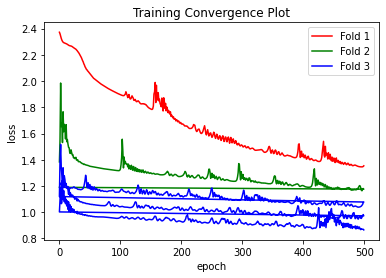

************ Overall Performance ************
CNN Accuracy: 0.5847 +/- 0.05509744095690832
Precision:0.5849840117377126 +/- 0.05433517347735732
Recall:0.5847 +/- 0.05509744095690832
F1 score:0.58211124680022 +/- 0.05469255519604276
************ Finish ************
loading data...
CNN Accuracy on test dataset: 0.597
Precision: 0.5937449768368114 Recall: 0.597 F1 score: 0.5942983838681659


In [ ]:
import numpy as np
import torch

# ---- Convolution Neuron Network script ----
if 1:
    # ---- parameter section -------------------------------
    np.random.seed(2)
    torch.manual_seed(2)
    # ------------------------------------------------------

    # ---- objection initialization section ---------------
    # training set
    data_obj = Dataset_Loader('CIFAR', 'Handwritten digits.')
    data_obj.dataset_source_folder_path = '/content/drive/MyDrive/ECS_189G_Project/Data/stage_3_data/'
    data_obj.dataset_source_file_name = 'CIFAR'
    data_obj.pre_load()

    # TODO change the below to cnn

    method_obj = Method_CNN('Convolutional Neuron Network', '')

    result_obj = Result_Saver('saver', '')
    result_obj.result_destination_folder_path = '/content/drive/MyDrive/ECS_189G_Project/result/stage_1_result/CNN_'
    result_obj.result_destination_file_name = 'prediction_result'

    setting_obj = Setting_KFold_CV('k fold cross validation', '')

    evaluate_obj = Evaluate_Accuracy('accuracy', '')
    # ------------------------------------------------------

    # ---- running section ---------------------------------
    print('************ Start ************')
    setting_obj.prepare(data_obj, method_obj, result_obj, evaluate_obj)
    setting_obj.print_setup_summary()
    mean_score, std_score, precision, std_pre, recall, std_recall, f1, std_f1 = setting_obj.load_run_save_evaluate_plot()
    print('************ Overall Performance ************')
    print('CNN Accuracy: ' + str(mean_score) + ' +/- ' + str(std_score))
    print('Precision:' + str(precision) + ' +/- ' + str(std_pre))
    print('Recall:' + str(recall) + ' +/- ' + str(std_recall))
    print('F1 score:' + str(f1) + ' +/- ' + str(std_f1))
    print('************ Finish ************')
    # ------------------------------------------------------

    scores = setting_obj.eval_test(data_obj)
    accuracy = scores[0]
    precision = scores[1][0]
    recall = scores[1][1]
    f1 = scores[1][2]
    print("CNN Accuracy on test dataset: {}".format(accuracy))
    print("Precision:", precision, "Recall:", recall, "F1 score:", f1)


In [ ]:

if 1:
    result_obj = Result_Loader('saver', '')
    result_obj.result_destination_folder_path = '/content/drive/MyDrive/ECS_189G_Project/result/stage_2_result/MLP_'
    result_obj.result_destination_file_name = 'prediction_result'

    for fold_count in [1, 2, 3, None]:
        result_obj.fold_count = fold_count
        result_obj.load()
        print('Fold:', fold_count, ', Result:', result_obj.data)

loading results...
Fold: 1 , Result: {'pred_y': tensor([3, 4, 9,  ..., 3, 3, 6]), 'true_y': array([5, 4, 9, ..., 3, 5, 6])}
loading results...
Fold: 2 , Result: {'pred_y': tensor([0, 9, 1,  ..., 9, 8, 8]), 'true_y': array([0, 2, 1, ..., 9, 8, 8])}
loading results...
Fold: 3 , Result: {'pred_y': tensor([1, 3, 4,  ..., 0, 6, 1]), 'true_y': array([1, 3, 4, ..., 0, 2, 1])}
loading results...


FileNotFoundError: ignored